In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
images = np.load("./final_data/images.npy")
labels = np.load("./final_data/labels.npy")

In [46]:
def check_data(n = 2):
    for i in range(n):
        index = int(np.random.random() * images.shape[0])
        plt.title(labels[index])
        plt.imshow(images[index])
        plt.show()


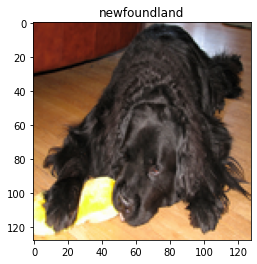

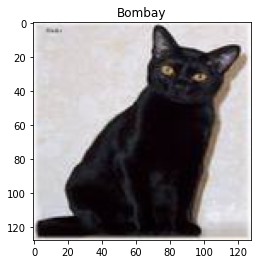

In [47]:
check_data()

In [48]:
from sklearn.decomposition import PCA

In [49]:
images = images.astype(float)/255

In [52]:
images_flattened = images.reshape(images.shape[0], -1)

In [54]:
images_flattened.shape

(1800, 49152)

In [60]:
labels.shape

(1800,)

In [68]:
breeds = []

for i in labels:
    if i not in breeds:
        breeds.append(i)

In [78]:
mapping = {}
value = 0
for i in breeds:
    mapping[i] = value
    value += 1

In [82]:
new_label = []
for i in labels:
    new_label.append(mapping[i])

In [85]:
new_label = np.array(new_label)

In [71]:
breeds_len = range(1,len(breeds)+1)

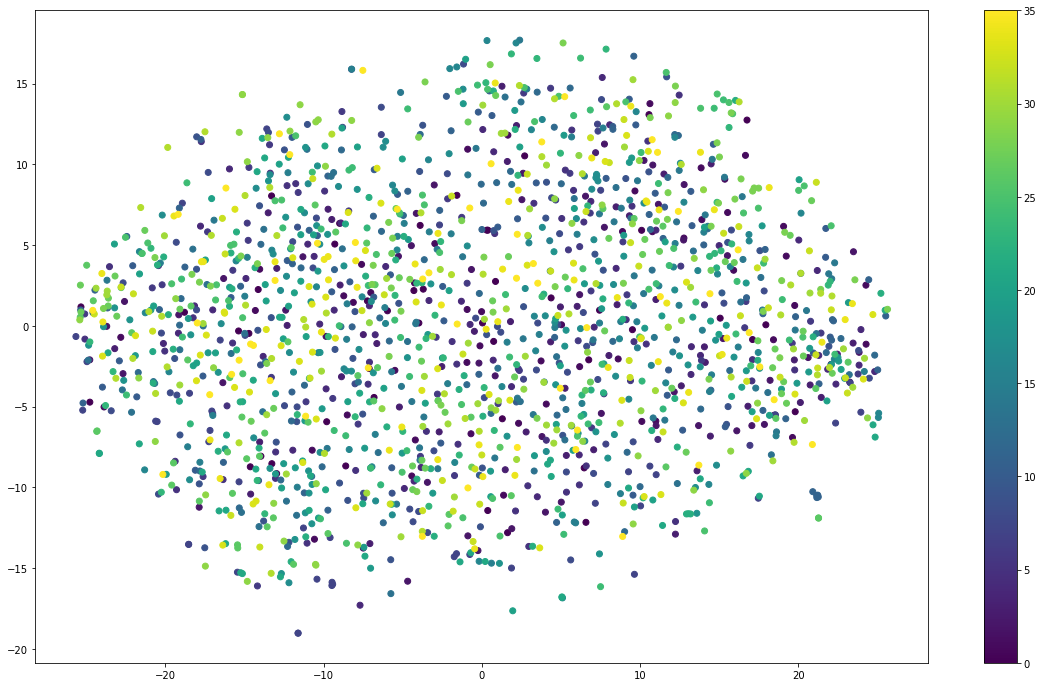

In [90]:
from sklearn.manifold import TSNE
from keras.datasets import cifar10
import matplotlib.pyplot as plt


X = images_flattened
y = new_label.reshape(-1)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE results
plt.figure(figsize=(20, 12))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c =new_label, cmap='viridis')
plt.colorbar()
plt.show()

In [116]:
from sklearn.cluster import KMeans

# create a KMeans object
kmeans = KMeans(n_clusters=2, random_state=0)

# fit the KMeans on the t-SNE transformed data
kmeans.fit(X_tsne)

# predict the cluster labels
y_predX_tsne = kmeans.predict(X_tsne)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


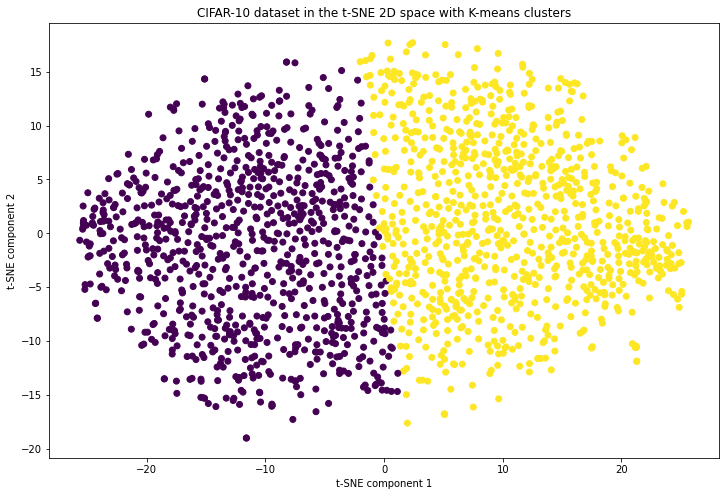

In [117]:
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_predX_tsne)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('CIFAR-10 dataset in the t-SNE 2D space with K-means clusters')
plt.show()

In [108]:
kmeans = KMeans(n_clusters=36, random_state=0)

# fit the KMeans on the t-SNE transformed data
kmeans.fit(X_tsne)

# predict the cluster labels
y_predX_tsne = kmeans.predict(X_tsne)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


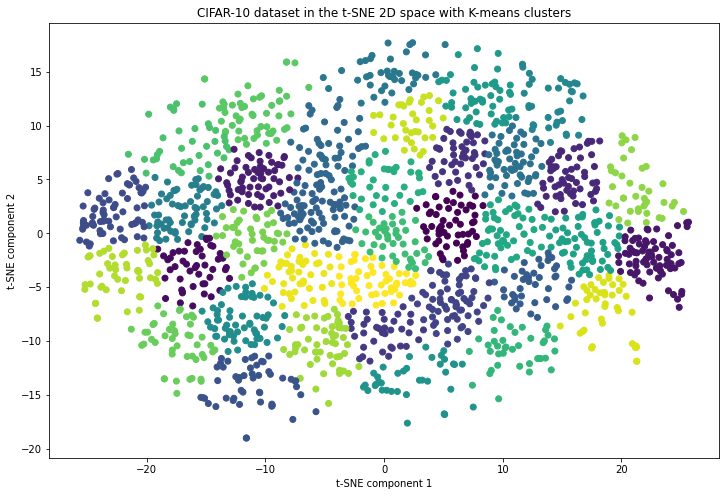

In [109]:
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_predX_tsne)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('CIFAR-10 dataset in the t-SNE 2D space with K-means clusters')
plt.show()

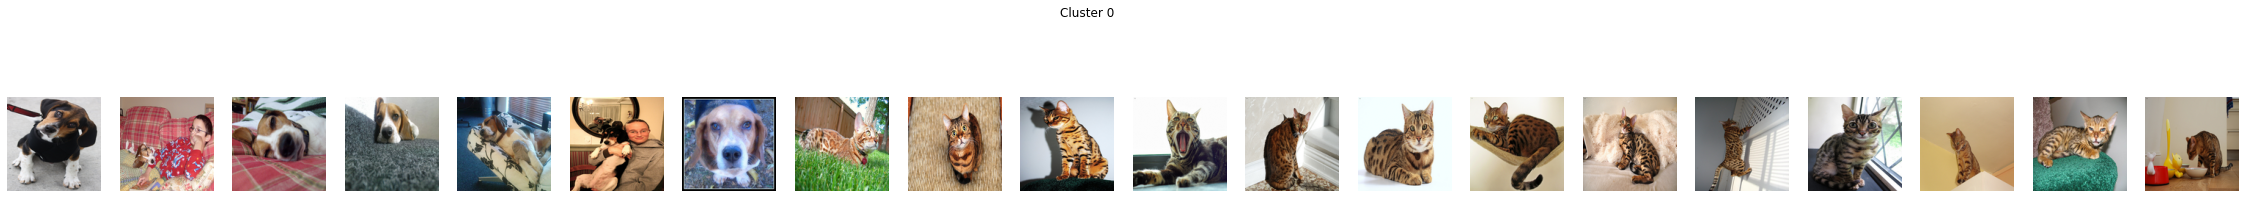

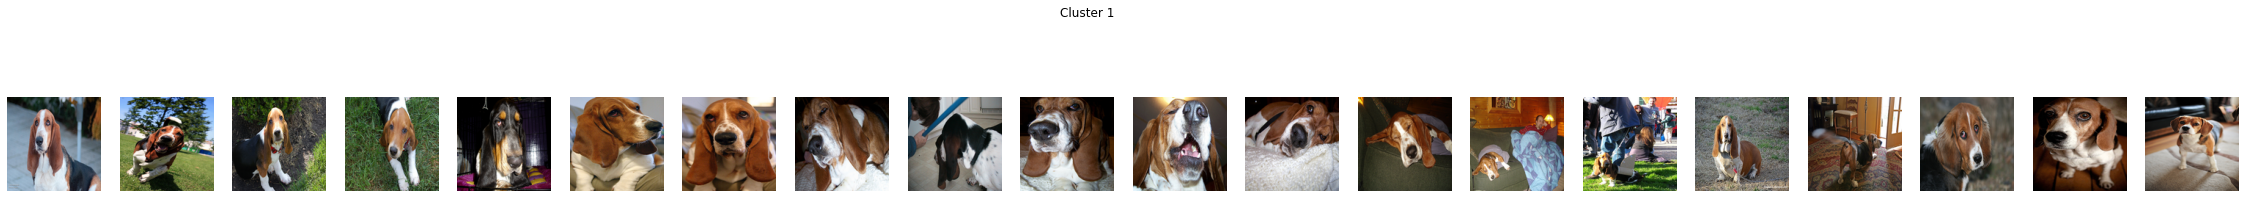

In [127]:
n_images = 20 # Number of images to display per cluster
for i in range(2):
    # get the indices of the data points in the current cluster
    cluster_indices = np.where(y_predX_tsne == i)[0]
    fig, axs = plt.subplots(1, n_images, figsize=(40, 4)) # Create a 1x3 grid of subplots
    for j in range(n_images):
        image = images[cluster_indices[j+100]]
        axs[j].imshow(image)
        axs[j].axis('off')
    plt.suptitle(f'Cluster {i}')
    plt.show()